In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
for x in os.listdir('data'):
    if x.endswith('csv'):
        print(x)

2018SanFranciscoBayWaterQualityData.csv
2019SanFranciscoBayWaterQualityData.csv
2016ver.3.0SanFranciscoBayWaterQualityData.csv
2017ver.3.0SanFranciscoBayWaterQualityData.csv
SanFranciscoBayWaterQualityData1969-2015v3.csv


In [3]:
def read_data(file):
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = [d if (d.year <= 2020) else d - pd.DateOffset(years=100) for d in df['Date']]    
    df['Station_Number'] = df['Station_Number']
    return df.set_index(['Date', 'Station_Number', 'Depth'])

In [4]:
df_old = read_data('data/SanFranciscoBayWaterQualityData1969-2015v3.csv')
df_2016 = read_data('data/2016ver.3.0SanFranciscoBayWaterQualityData.csv')
df_2017 = read_data('data/2017ver.3.0SanFranciscoBayWaterQualityData.csv')
df_2018 = read_data('data/2018SanFranciscoBayWaterQualityData.csv')
df_2019 = read_data('data/2019SanFranciscoBayWaterQualityData.csv')

In [5]:
df = pd.concat([df_old, df_2016, df_2017, df_2018, df_2019])
df = df.reset_index()

In [6]:
df.head()

,Date,Station_Number,Depth,Discrete_Chlorophyll,Calculated_Chlorophyll,Discrete_Oxygen,Calculated_Oxygen,Discrete_SPM,Calculated_SPM,Extinction_Coefficient,Salinity,Temperature,Nitrite,Nitrate_+_Nitrite,Ammonium,Phosphate,Silicate,Time,Oxygen
0,1969-04-10,4.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1969-04-10,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,13.1,0.7,NaN,NaN,1.6,236.0,NaN,NaN
2,1969-04-10,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1969-04-10,4.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1969-04-10,5.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


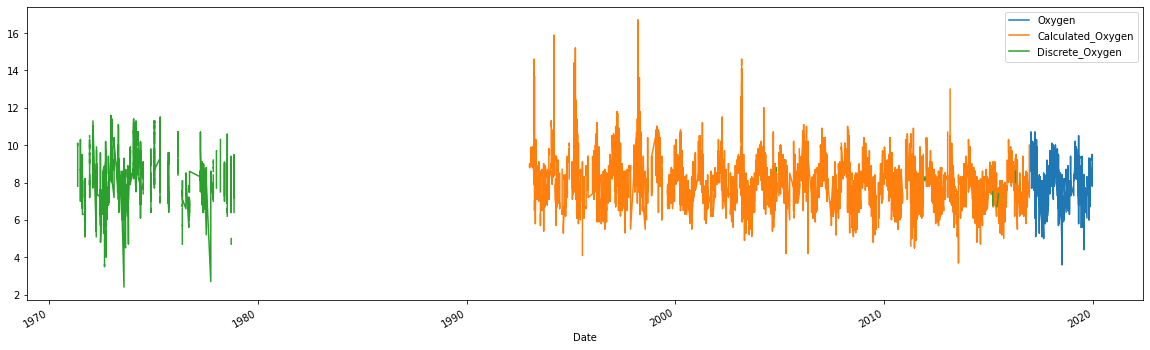

In [7]:
df_plt = df.set_index('Date')

plt.figure(figsize=(20,6))
df_plt['Oxygen'].plot()
df_plt['Calculated_Oxygen'].plot()
df_plt['Discrete_Oxygen'].plot()
plt.legend()
plt.show()

In [8]:
df.loc[df['Oxygen'].isna(), 'Oxygen'] = df.loc[df['Oxygen'].isna(), 'Calculated_Oxygen']
df.loc[df['Oxygen'].isna(), 'Oxygen'] = df.loc[df['Oxygen'].isna(), 'Discrete_Oxygen']
df.drop(['Calculated_Oxygen', 'Discrete_Oxygen'], axis=1, inplace=True)

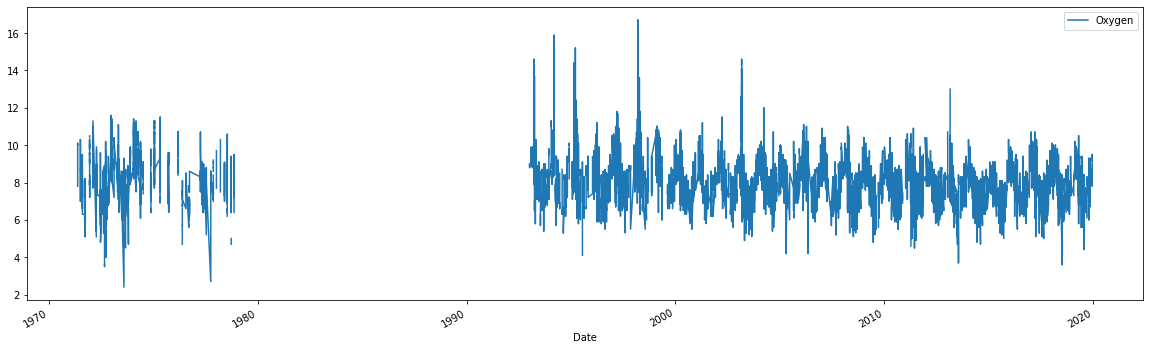

In [9]:
df_plt = df.set_index('Date')

plt.figure(figsize=(20,6))
df_plt['Oxygen'].plot()
plt.legend()
plt.show()

In [10]:
df.head()

,Date,Station_Number,Depth,Discrete_Chlorophyll,Calculated_Chlorophyll,Discrete_SPM,Calculated_SPM,Extinction_Coefficient,Salinity,Temperature,Nitrite,Nitrate_+_Nitrite,Ammonium,Phosphate,Silicate,Time,Oxygen
0,1969-04-10,4.0,0.5,NaN,NaN,NaN,NaN,NaN,0.3,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1969-04-10,4.0,2.0,NaN,NaN,NaN,NaN,NaN,0.3,13.1,0.7,NaN,NaN,1.6,236.0,NaN,NaN
2,1969-04-10,4.0,4.0,NaN,NaN,NaN,NaN,NaN,0.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1969-04-10,4.0,11.0,NaN,NaN,NaN,NaN,NaN,0.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1969-04-10,5.0,0.5,NaN,NaN,NaN,NaN,NaN,0.3,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.groupby(['Depth']).count().sort_values('Oxygen', ascending=False).head()

,Date,Station_Number,Discrete_Chlorophyll,Calculated_Chlorophyll,Discrete_SPM,Calculated_SPM,Extinction_Coefficient,Salinity,Temperature,Nitrite,Nitrate_+_Nitrite,Ammonium,Phosphate,Silicate,Time,Oxygen
Depth,,,,,,,,,,,,,,,,
2.0,19565,19565,6875,17306,6114,15546,571,19509,19284,4777,6491,6142,6558,5758,2188,15156
1.0,19833,19833,2145,18237,930,16447,12993,19765,19599,1625,1699,1651,1693,1675,2142,14267
5.0,17818,17818,165,16719,112,14946,1,17790,17660,147,395,364,414,236,2179,14165
4.0,16540,16540,29,16056,24,14220,0,16515,16521,4,4,5,5,3,2186,13772
3.0,16537,16537,20,16005,16,14171,1,16509,16517,0,5,0,4,5,2187,13764


In [12]:
depth = 2.0

In [13]:
df = df[df['Depth'] == depth]

In [14]:
df.head()

,Date,Station_Number,Depth,Discrete_Chlorophyll,Calculated_Chlorophyll,Discrete_SPM,Calculated_SPM,Extinction_Coefficient,Salinity,Temperature,Nitrite,Nitrate_+_Nitrite,Ammonium,Phosphate,Silicate,Time,Oxygen
1,1969-04-10,4.0,2.0,NaN,NaN,NaN,NaN,NaN,0.3,13.1,0.7,NaN,NaN,1.6,236.0,NaN,NaN
5,1969-04-10,5.0,2.0,NaN,NaN,NaN,NaN,NaN,0.2,14.0,NaN,NaN,NaN,5.2,236.0,NaN,NaN
9,1969-04-10,6.0,2.0,NaN,NaN,NaN,NaN,NaN,0.1,13.7,0.7,NaN,NaN,NaN,232.0,NaN,NaN
13,1969-04-10,7.0,2.0,NaN,NaN,NaN,NaN,NaN,0.1,14.4,0.7,NaN,NaN,1.3,230.0,NaN,NaN
18,1969-04-10,8.0,2.0,NaN,NaN,NaN,NaN,NaN,0.1,14.3,0.7,NaN,NaN,1.0,216.0,NaN,NaN


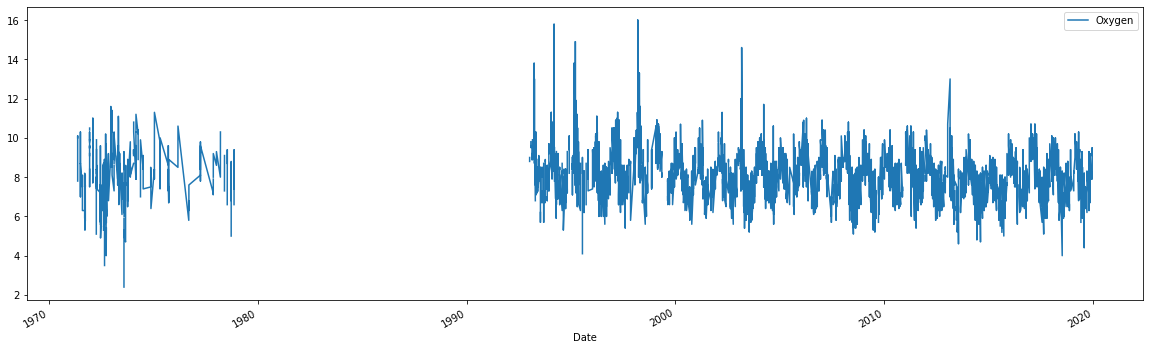

In [15]:
df_plt = df.set_index('Date')

plt.figure(figsize=(20,6))
df_plt['Oxygen'].plot()
plt.legend()
plt.show()

In [16]:
df = df[['Date', 'Station_Number', 'Oxygen']]

In [17]:
df = df.dropna()

In [18]:
df.head()

,Date,Station_Number,Oxygen
1275,1971-05-13,4.0,10.0
1276,1971-05-13,5.0,10.1
1277,1971-05-13,6.0,10.0
1278,1971-05-13,7.0,9.6
1279,1971-05-13,8.0,9.4


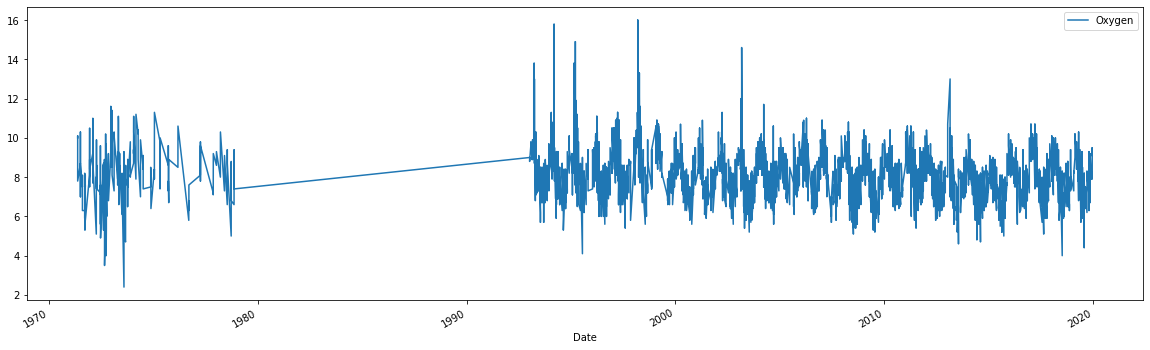

In [19]:
df_plt = df.set_index('Date')

plt.figure(figsize=(20,6))
df_plt['Oxygen'].plot()
plt.legend()
plt.show()

In [20]:
set(df['Date'])

{Timestamp('1971-05-13 00:00:00'),
 Timestamp('1971-06-30 00:00:00'),
 Timestamp('1971-08-03 00:00:00'),
 Timestamp('1971-08-04 00:00:00'),
 Timestamp('1971-09-13 00:00:00'),
 Timestamp('1971-09-14 00:00:00'),
 Timestamp('1971-09-17 00:00:00'),
 Timestamp('1971-09-23 00:00:00'),
 Timestamp('1971-09-24 00:00:00'),
 Timestamp('1971-12-07 00:00:00'),
 Timestamp('1971-12-08 00:00:00'),
 Timestamp('1971-12-09 00:00:00'),
 Timestamp('1972-02-01 00:00:00'),
 Timestamp('1972-02-02 00:00:00'),
 Timestamp('1972-02-04 00:00:00'),
 Timestamp('1972-04-03 00:00:00'),
 Timestamp('1972-04-06 00:00:00'),
 Timestamp('1972-04-07 00:00:00'),
 Timestamp('1972-04-11 00:00:00'),
 Timestamp('1972-04-13 00:00:00'),
 Timestamp('1972-06-14 00:00:00'),
 Timestamp('1972-06-15 00:00:00'),
 Timestamp('1972-06-16 00:00:00'),
 Timestamp('1972-06-29 00:00:00'),
 Timestamp('1972-07-28 00:00:00'),
 Timestamp('1972-08-08 00:00:00'),
 Timestamp('1972-08-09 00:00:00'),
 Timestamp('1972-08-10 00:00:00'),
 Timestamp('1972-08-

In [21]:
start_date = datetime.datetime(1990, 1, 1, 0, 0)

In [22]:
df = df[df['Date'] > start_date]

In [23]:
df

,Date,Station_Number,Oxygen
40742,1993-01-05,33.0,9.0
40753,1993-01-05,32.0,8.9
40768,1993-01-05,31.0,8.9
40784,1993-01-05,30.0,8.9
40796,1993-01-05,29.5,8.9
...,...,...,...
241965,2019-12-19,4.0,9.2
241981,2019-12-19,3.0,9.1
241993,2019-12-19,2.0,9.0
242003,2019-12-19,649.0,8.9


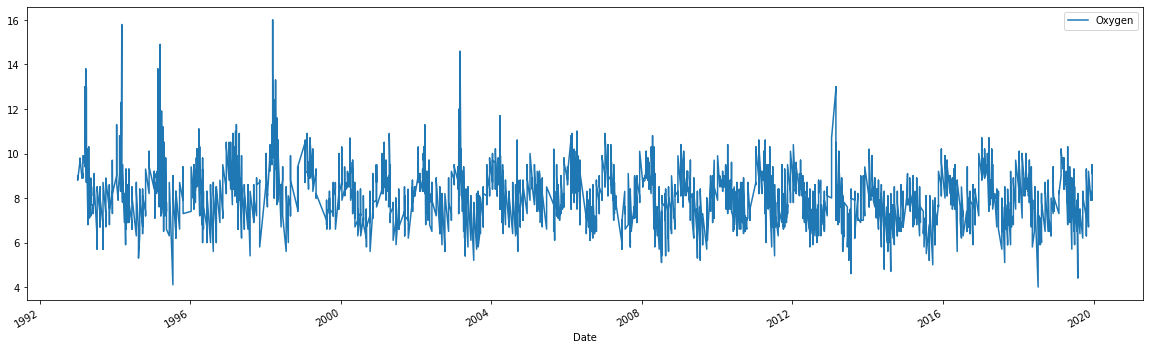

In [24]:
df_plt = df.set_index('Date')

plt.figure(figsize=(20,6))
df_plt['Oxygen'].plot()
plt.legend()
plt.show()

In [25]:
df['month'] = df['Date'].dt.month

In [26]:
df['year'] = df['Date'].dt.year

In [27]:
df.head()

,Date,Station_Number,Oxygen,month,year
40742,1993-01-05,33.0,9.0,1,1993
40753,1993-01-05,32.0,8.9,1,1993
40768,1993-01-05,31.0,8.9,1,1993
40784,1993-01-05,30.0,8.9,1,1993
40796,1993-01-05,29.5,8.9,1,1993


In [28]:
df_month = df.groupby(['year', 'month', 'Station_Number']).mean()
df_month

Oxygen
year month Station_Number        
1993 1     11.0              9.80
           12.0              9.70
           13.0              9.50
           15.0              9.50
           18.0              9.60
...                           ...
2019 12    34.0              8.05
           35.0              8.00
           36.0              7.95
           649.0             8.90
           657.0             9.10

[10115 rows x 1 columns]

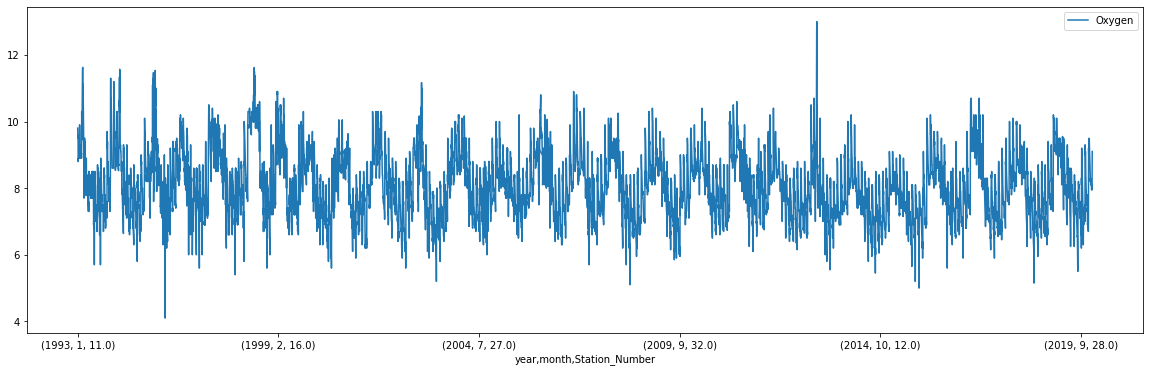

In [29]:
plt.figure(figsize=(20,6))
df_month['Oxygen'].plot()

plt.legend()
plt.show()

In [30]:
coords = {
    657: '38.151667, -121.688333',
    649: '38.060000, -121.800000',
    2: '38.063333, -121.851667',
    3: '38.051667, -121.880000',
    4: '38.048333, -121.935000',
    5: '38.060000, -121.980000',
    6: '38.065000, -122.035000',
    7: '38.048333, -122.096667',
    8: '38.030000, -122.151667',
    9: '38.056667, -122.185000',
    10: '38.060000, -122.208333',
    11: '38.060000, -122.266667',
    12: '38.051667, -122.311667',
    13: '38.028333, -122.370000',
    14: '38.006667, -122.405000',
    15: '37.973333, -122.436667',
    16: '37.916667, -122.446667',
    17: '37.878333, -122.421667',
    18: '37.846667, -122.421667',
    20: '37.820000, -122.393333',
    21: '37.788333, -122.358333',
    22: '37.765000, -122.358333',
    23: '37.728333, -122.336667',
    24: '37.698333, -122.338333',
    25: '37.670000, -122.325000',
    26: '37.636667, -122.313333',
    27: '37.618333, -122.291667',
    28: '37.601667, -122.270000',
    29: '37.580000, -122.245000',
    29.5: '37.568333, -122.218333',
    30: '37.555000, -122.190000',
    31: '37.528333, -122.158333',
    32: '37.518333, -122.133333',
    33: '37.508333, -122.121667',
    34: '37.495000, -122.098333',
    35: '37.480000, -122.078333',
    36: '37.471667, -122.066667',
    662: '38.226667, 121.670000',
    659: '38.178333, 121.666667',
    655: '38.121667, 121.701667',
    654: '38.105000, 121.708333',
    653: '38.105000, 121.720000',
    652: '38.086667, 121.746667',
    651: '38.078333, 121.763333',
    650: '38.071667, 121.775000',
    411: '38.096667, 122.058333',
    407: '38.071667, 122.093333',
    405: '38.048333, 122.123333',
    12.5: '38.040000, 122.315000',
    19: '37.818333, 122.471667',
    28.5: '37.596667, 122.235000'
}

In [31]:
set(df_month.reset_index()['Station_Number'])

{2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 12.5,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 28.5,
 29.0,
 29.5,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 405.0,
 407.0,
 411.0,
 649.0,
 651.0,
 653.0,
 657.0}

In [32]:
df_month = df_month.reset_index()

In [33]:
lats = [float(coords[number].split(', ')[0]) for number in df_month['Station_Number']]
lats

[38.06,
 38.051667,
 38.028333,
 37.973333,
 37.846667,
 37.788333,
 37.765,
 37.728333,
 37.698333,
 37.67,
 37.618333,
 37.601667,
 37.596667,
 37.58,
 37.568333,
 37.555,
 37.528333,
 37.518333,
 37.508333,
 38.028333,
 37.973333,
 37.846667,
 37.788333,
 37.765,
 37.728333,
 37.698333,
 37.67,
 37.636667,
 37.618333,
 37.601667,
 37.58,
 37.568333,
 37.555,
 37.528333,
 37.518333,
 37.508333,
 37.495,
 37.48,
 37.471667,
 38.06,
 38.028333,
 37.973333,
 37.788333,
 37.765,
 37.728333,
 37.698333,
 37.67,
 37.636667,
 37.618333,
 37.601667,
 37.58,
 37.568333,
 37.555,
 37.528333,
 37.518333,
 37.508333,
 37.495,
 37.48,
 37.471667,
 38.03,
 38.056667,
 38.06,
 38.06,
 38.051667,
 38.028333,
 38.006667,
 37.973333,
 37.846667,
 37.788333,
 37.765,
 37.728333,
 37.698333,
 37.67,
 37.636667,
 37.618333,
 37.601667,
 37.596667,
 37.58,
 37.568333,
 37.555,
 37.528333,
 37.518333,
 37.508333,
 37.495,
 37.48,
 37.471667,
 38.056667,
 38.06,
 38.06,
 38.051667,
 38.028333,
 38.006667,
 

In [34]:
lngs = [float(coords[number].split(', ')[1]) for number in df_month['Station_Number']]
lngs

[-122.266667,
 -122.311667,
 -122.37,
 -122.436667,
 -122.421667,
 -122.358333,
 -122.358333,
 -122.336667,
 -122.338333,
 -122.325,
 -122.291667,
 -122.27,
 122.235,
 -122.245,
 -122.218333,
 -122.19,
 -122.158333,
 -122.133333,
 -122.121667,
 -122.37,
 -122.436667,
 -122.421667,
 -122.358333,
 -122.358333,
 -122.336667,
 -122.338333,
 -122.325,
 -122.313333,
 -122.291667,
 -122.27,
 -122.245,
 -122.218333,
 -122.19,
 -122.158333,
 -122.133333,
 -122.121667,
 -122.098333,
 -122.078333,
 -122.066667,
 -122.208333,
 -122.37,
 -122.436667,
 -122.358333,
 -122.358333,
 -122.336667,
 -122.338333,
 -122.325,
 -122.313333,
 -122.291667,
 -122.27,
 -122.245,
 -122.218333,
 -122.19,
 -122.158333,
 -122.133333,
 -122.121667,
 -122.098333,
 -122.078333,
 -122.066667,
 -122.151667,
 -122.185,
 -122.208333,
 -122.266667,
 -122.311667,
 -122.37,
 -122.405,
 -122.436667,
 -122.421667,
 -122.358333,
 -122.358333,
 -122.336667,
 -122.338333,
 -122.325,
 -122.313333,
 -122.291667,
 -122.27,
 122.235,
 

In [35]:
df_month['Lat'] = lats
df_month['Lng'] = lngs

In [36]:
df_month

,year,month,Station_Number,Oxygen,Lat,Lng
0,1993,1,11.0,9.80,38.060000,-122.266667
1,1993,1,12.0,9.70,38.051667,-122.311667
2,1993,1,13.0,9.50,38.028333,-122.370000
3,1993,1,15.0,9.50,37.973333,-122.436667
4,1993,1,18.0,9.60,37.846667,-122.421667
...,...,...,...,...,...,...
10110,2019,12,34.0,8.05,37.495000,-122.098333
10111,2019,12,35.0,8.00,37.480000,-122.078333
10112,2019,12,36.0,7.95,37.471667,-122.066667
10113,2019,12,649.0,8.90,38.060000,-121.800000


In [37]:
df_month.to_csv('../oxygen.csv')